In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

dataPath = "../Data/students_mental_health_survey.csv"

df = pd.read_csv(dataPath)

dataset_shape = df.shape
dataset_info = df.info
missing_vals = df.isnull().sum()
print(f"Dataset Shape: {dataset_shape}\nData Types and Column Info: \n{dataset_info}\nMissing Values: {missing_vals}")



Dataset Shape: (7022, 20)
Data Types and Column Info: 
<bound method DataFrame.info of       Age            Course  Gender  CGPA  Stress_Level  Depression_Score  \
0      25            Others    Male  3.56             3                 3   
1      24       Engineering  Female  2.44             0                 3   
2      19          Business  Female  3.74             4                 0   
3      19  Computer Science    Male  3.65             2                 1   
4      18          Business    Male  3.40             3                 3   
...   ...               ...     ...   ...           ...               ...   
7017   20               Law  Female  3.69             3                 1   
7018   24           Medical  Female  3.73             3                 4   
7019   26            Others    Male  3.65             4                 5   
7020   24           Medical    Male  3.65             4                 3   
7021   22           Medical  Female   NaN             3           

In [4]:
# unique values per column:

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)


Unique values in 'Age':
[25 24 19 18 21 23 28 22 27 20 31 26 35 30 32 29 34 33]
Unique values in 'Course':
['Others' 'Engineering' 'Business' 'Computer Science' 'Medical' 'Law']
Unique values in 'Gender':
['Male' 'Female']
Unique values in 'CGPA':
[3.56 2.44 3.74 3.65 3.4  3.35 3.8  3.05  nan 3.19 3.26 3.2  3.61 3.85
 3.46 3.43 3.38 3.5  3.6  3.08 3.88 3.21 3.62 3.16 3.71 3.48 3.27 3.41
 3.22 3.33 3.01 3.97 4.   3.63 2.99 3.11 3.02 3.66 3.09 3.12 3.82 3.23
 3.7  2.95 3.73 3.64 3.79 3.59 3.34 3.87 3.24 3.44 3.1  3.25 3.53 3.
 3.29 2.98 3.04 3.51 3.75 3.86 3.78 3.77 3.72 3.45 3.06 3.84 3.92 3.28
 2.86 3.37 3.54 3.31 3.94 3.9  3.52 3.32 3.14 3.68 2.85 2.91 3.99 3.81
 3.07 3.3  3.39 3.42 3.55 2.94 3.93 3.36 3.67 3.91 3.49 3.58 3.13 3.69
 3.98 3.47 2.92 3.15 2.79 3.83 3.57 3.89 2.97 3.76 3.17 3.03 2.77 2.87
 2.64 2.84 2.88 2.8  3.18 2.89 2.82 2.73 2.96 3.96 2.83 2.7  3.95 2.76
 2.68 2.93 2.9  2.65 2.81 2.69 2.6  2.58 2.75 2.74 2.78 2.52 2.61 2.66
 2.63 2.71 2.49 2.67]
Unique values in 'Stre

In [5]:
# make some of the columns from categorical into numerical
df['Gender'] = df['Gender'].apply(lambda x:  1 if x=='Male' else 0)

df.head()

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,1,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,0,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,0,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,1,3.65,2,1,0,Average,Low,Average,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,1,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus


In [6]:
mod_low_high = ['Physical_Activity', 'Social_Support', 'Extracurricular_Involvement']
yes_no = ['Family_History', 'Chronic_Illness']
freq = ['Substance_Use', 'Counseling_Service_Use']
good_bad = ['Sleep_Quality','Diet_Quality']

mod_low_high_mapping = {'Low': 0, 'Moderate': 0.5, 'High': 1}
yes_no_map = {'Yes': 1, 'No': 0}
freq_map = {'Never': 0, 'Occasionally': 0.5, None:None, 'Frequently': 1}
good_bad_map = {'Good': 1, 'Poor': 0,'Average':0.5}
relationship_map = {'Married': 1, 'Single': 0, 'In a Relationship':0.5}
housing_map = {'On-Campus': 0, 'Off-Campus': 0.5, 'With Family': 1}

for column in mod_low_high:
    df[column] = df[column].map(mod_low_high_mapping)

for column in yes_no:
    df[column] = df[column].map(yes_no_map)

for column in freq:
    df[column] = df[column].map(freq_map)

for column in good_bad:
    df[column] = df[column].map(good_bad_map)

df['Relationship_Status'] = df['Relationship_Status'].map(relationship_map)
df['Residence_Type'] = df['Residence_Type'].map(housing_map)

df = df.dropna()

In [7]:

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)


Unique values in 'Age':
[25 24 19 18 21 22 27 20 31 26 35 23 30 32 29 28 34 33]
Unique values in 'Course':
['Others' 'Engineering' 'Business' 'Medical' 'Law' 'Computer Science']
Unique values in 'Gender':
[1 0]
Unique values in 'CGPA':
[3.56 2.44 3.74 3.4  3.35 3.65 3.8  3.19 3.26 3.2  3.61 3.85 3.46 3.43
 3.38 3.5  3.6  3.08 3.88 3.21 3.62 3.16 3.71 3.48 3.27 3.41 3.22 3.33
 3.01 3.97 4.   3.63 2.99 3.11 3.02 3.66 3.09 3.12 3.82 3.23 3.7  3.73
 3.79 3.59 3.34 3.87 3.24 3.44 3.1  3.25 3.53 3.   3.29 2.98 3.04 3.51
 3.75 3.86 3.78 3.77 3.72 3.45 3.06 3.05 3.84 3.92 3.28 2.86 3.64 3.37
 3.54 3.31 3.94 3.9  3.52 3.32 3.14 3.68 2.85 2.91 3.99 3.81 3.07 3.3
 3.39 3.42 3.55 2.94 3.93 3.36 3.67 3.91 3.49 3.58 3.13 3.69 3.98 3.47
 2.92 3.15 2.79 3.83 3.57 3.89 2.97 3.76 3.17 3.03 2.77 2.87 2.64 2.84
 2.88 2.8  2.95 3.18 2.89 2.82 2.73 2.96 3.96 2.83 2.7  3.95 2.76 2.68
 2.93 2.9  2.65 2.81 2.69 2.6  2.58 2.75 2.74 2.78 2.52 2.61 2.66 2.63
 2.71 2.49 2.67]
Unique values in 'Stress_Level':
[3 0 

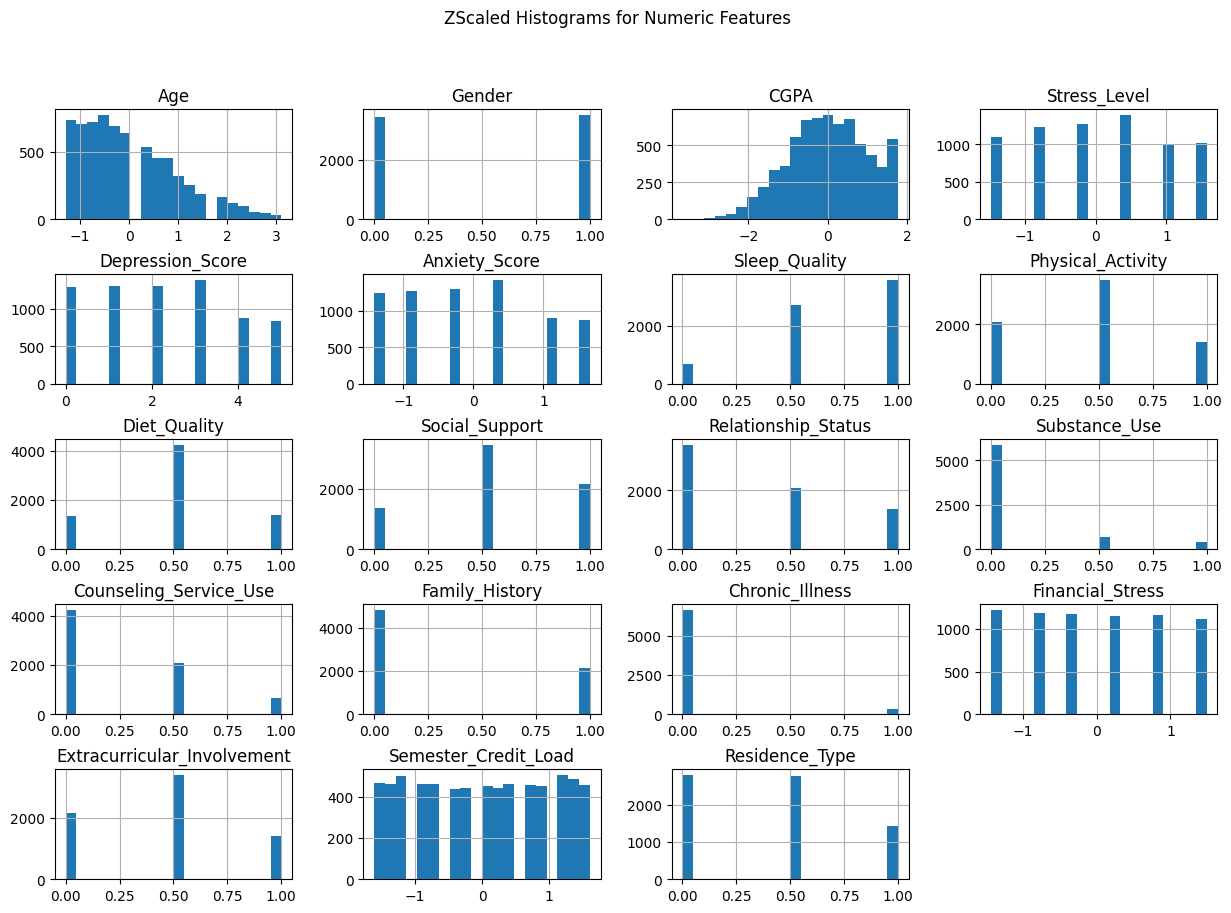

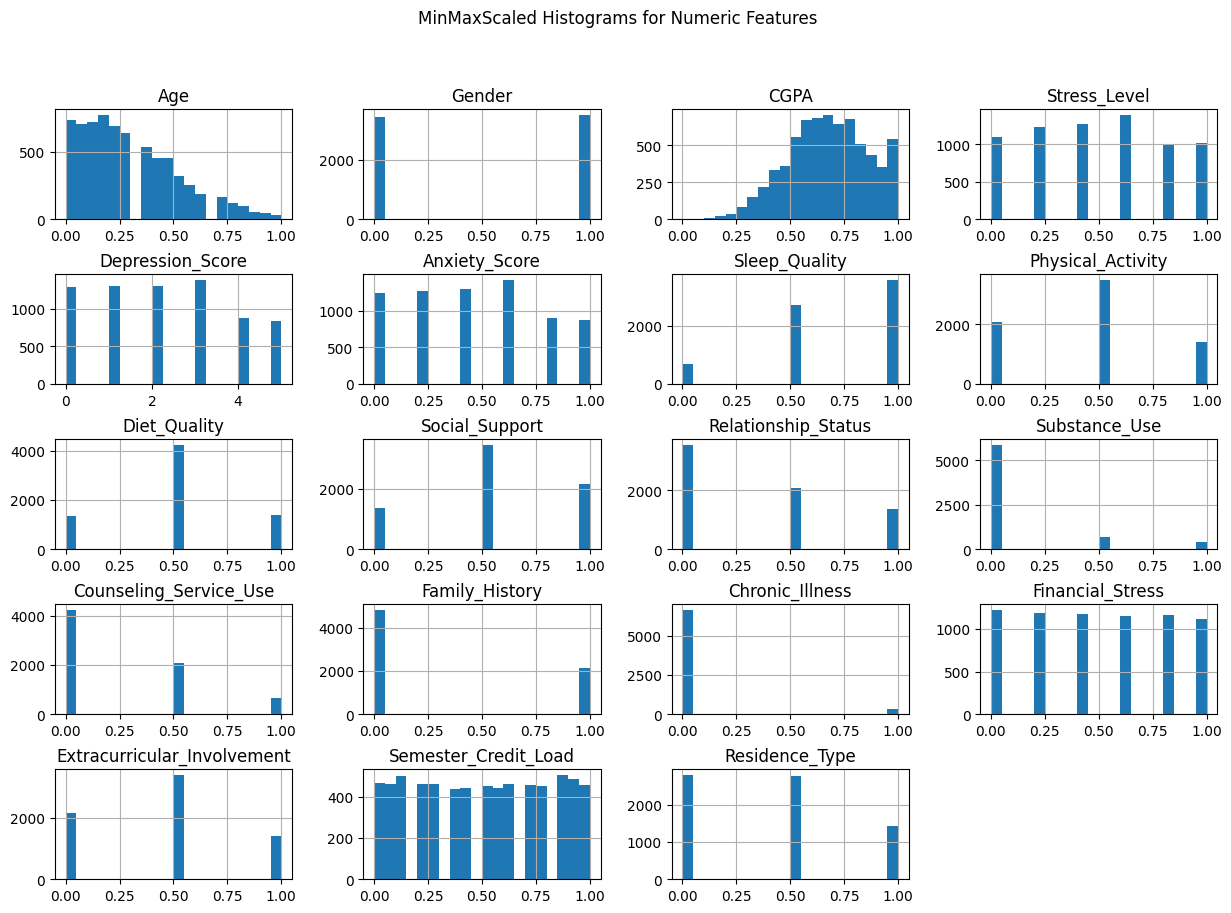

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

column_names= ['Age', 'CGPA', 'Stress_Level', 'Anxiety_Score', 'Semester_Credit_Load', 'Financial_Stress']

Zscaler = StandardScaler()
minMaxScaler = MinMaxScaler()
df_Zscaled = df.copy()
df_MinMaxScaled= df.copy()

df_Zscaled[column_names] = Zscaler.fit_transform(df[column_names])
df_MinMaxScaled[column_names] = minMaxScaler.fit_transform(df[column_names])

df_Zscaled.hist(bins=20, figsize=(15, 10))
plt.suptitle('ZScaled Histograms for Numeric Features')
plt.subplots_adjust(hspace=0.5)
plt.show()

df_MinMaxScaled.hist(bins=20, figsize=(15, 10))
plt.suptitle('MinMaxScaled Histograms for Numeric Features')
plt.subplots_adjust(hspace=0.5)
plt.show()



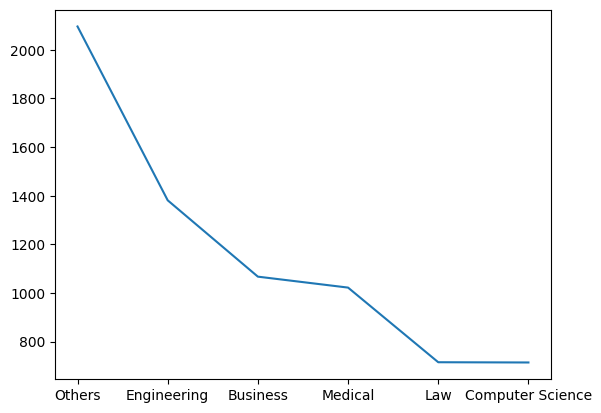

In [9]:
plt.plot(df['Course'].unique(), df['Course'].value_counts())

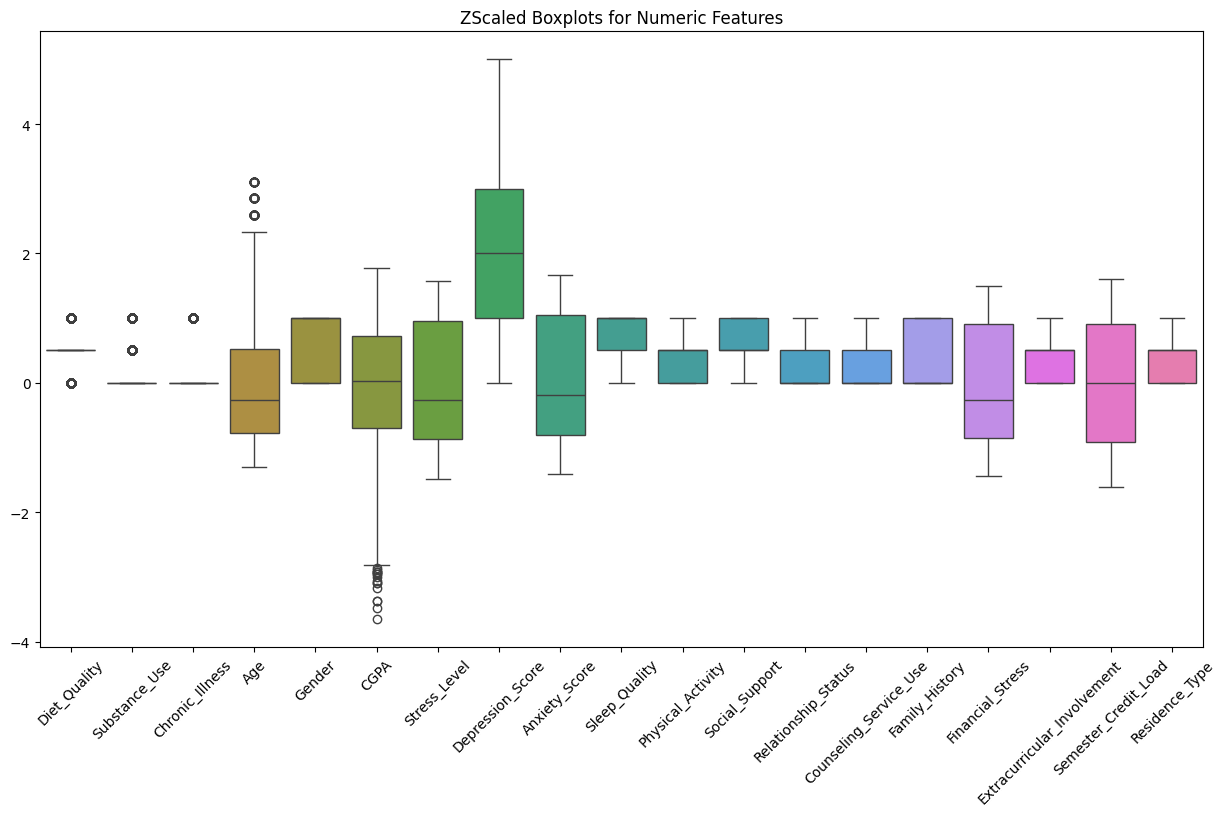

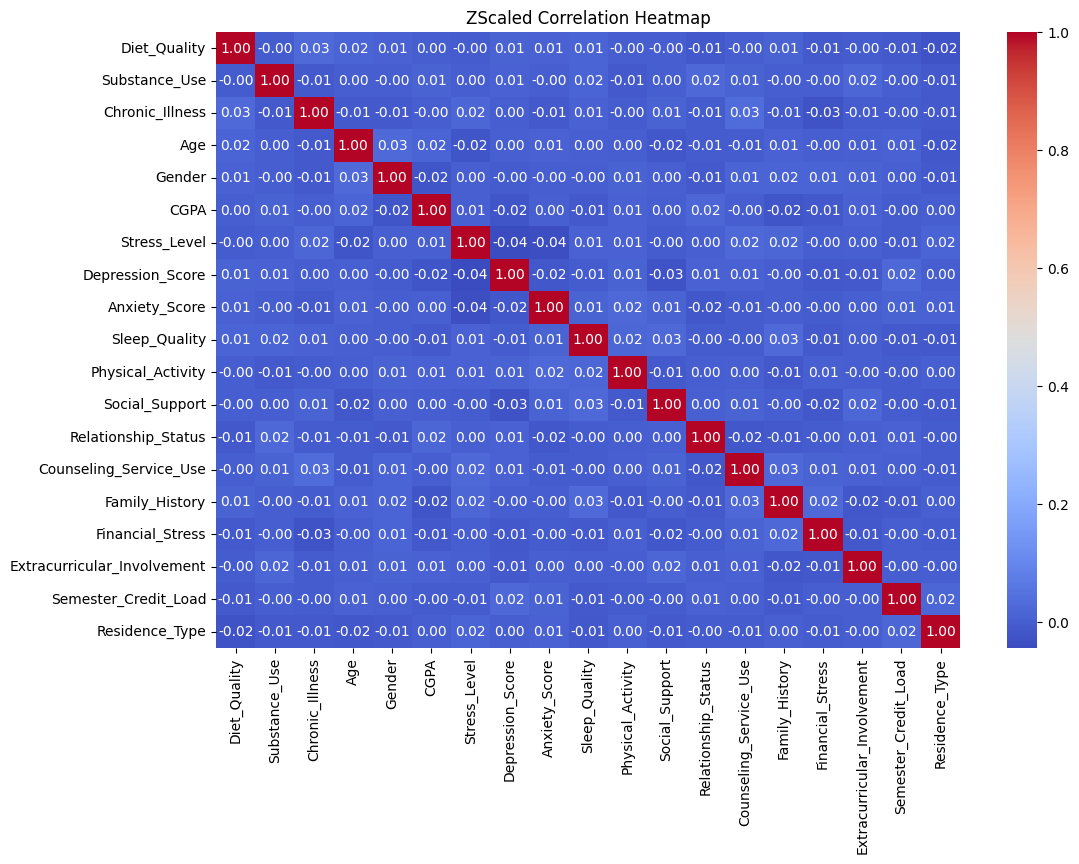

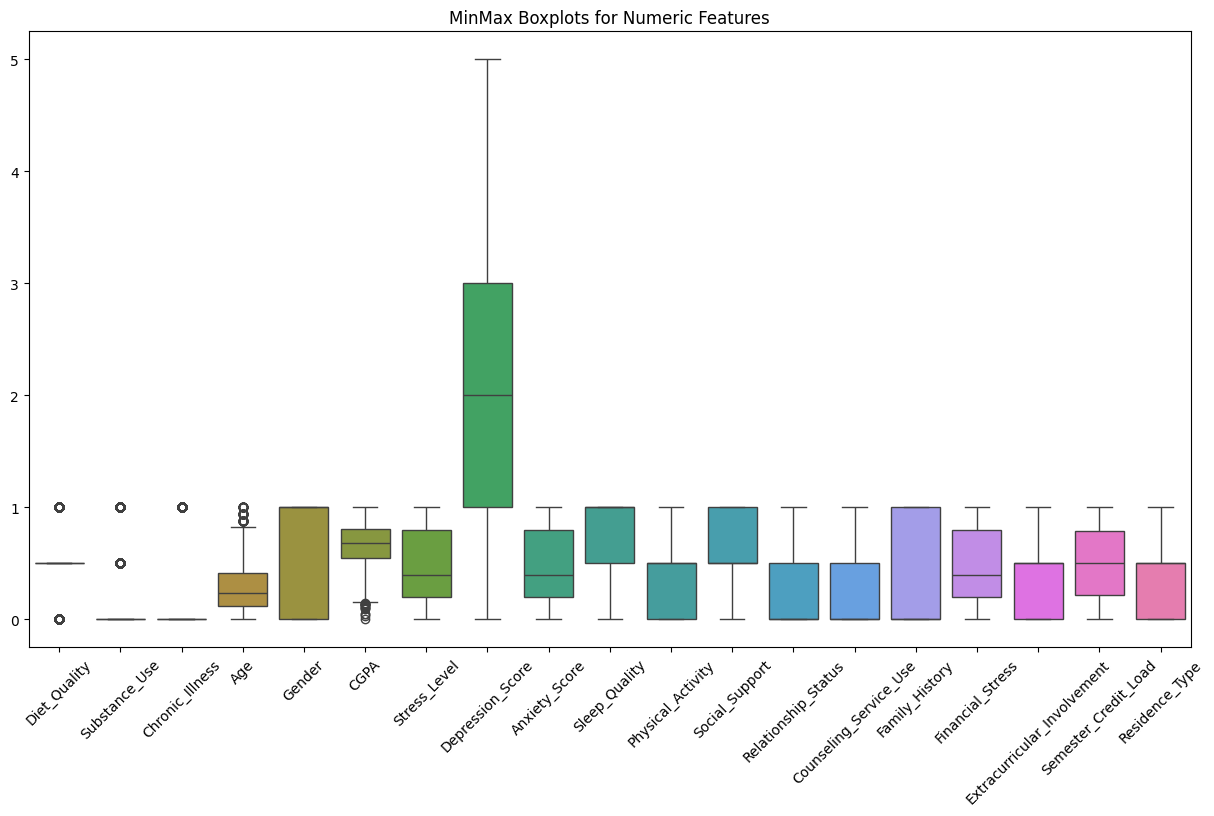

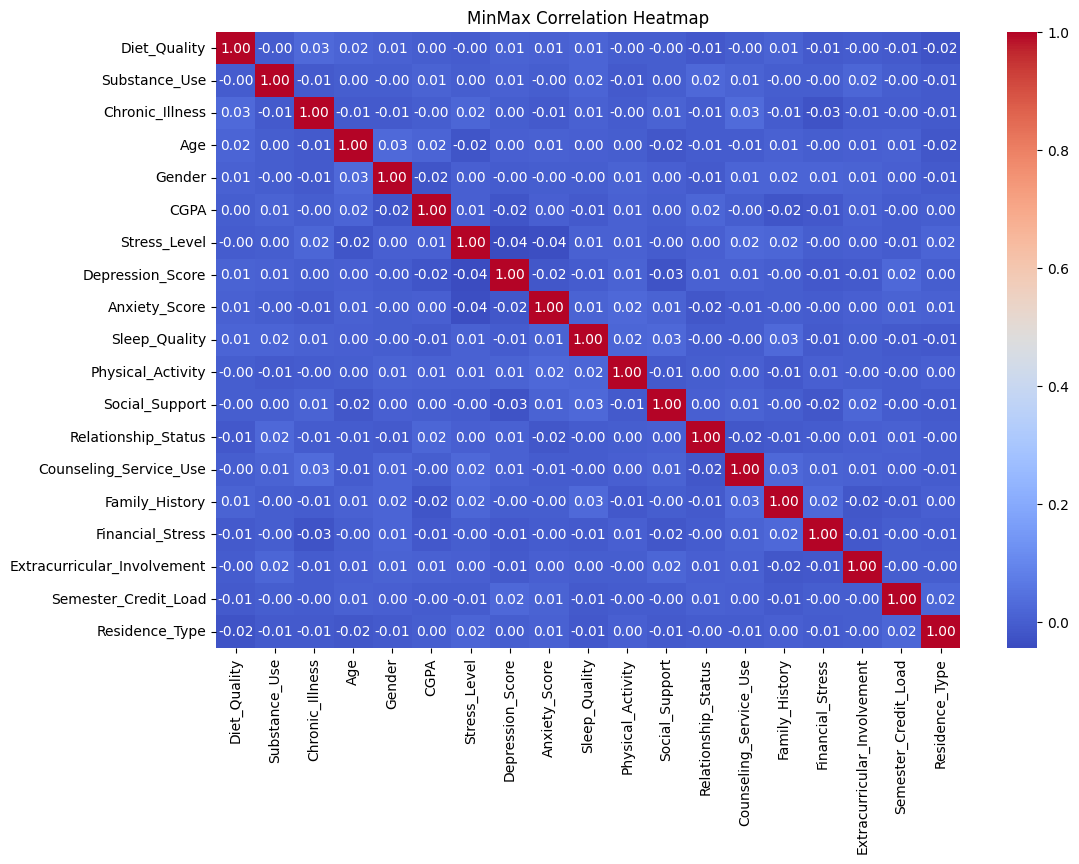

In [7]:
all_cols =['Age', 'Course', 'Gender', 'CGPA', 'Stress_Level', 'Depression_Score', 'Anxiety_Score', 'Sleep_Quality', 'Physical_Activity', 'Diet_Quality', 'Social_Support', 'Relationship_Status', 'Substance_Use', 'Counseling_Service_Use', 'Family_History', 'Chronic_Illness', 'Financial_Stress', 'Extracurricular_Involvement', 'Semester_Credit_Load', 'Residence_Type']
cols_to_graph =['Diet_Quality', 'Substance_Use', 'Chronic_Illness','Age', 'Gender', 'CGPA', 'Stress_Level', 'Depression_Score', 'Anxiety_Score', 'Sleep_Quality', 'Physical_Activity', 'Social_Support', 'Relationship_Status', 'Counseling_Service_Use', 'Family_History', 'Financial_Stress', 'Extracurricular_Involvement', 'Semester_Credit_Load', 'Residence_Type']

# Z_Scaled
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_Zscaled[cols_to_graph])
plt.title('ZScaled Boxplots for Numeric Features')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
correlation_matrix = df_Zscaled[cols_to_graph].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('ZScaled Correlation Heatmap')
plt.show()

# MinMax
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_MinMaxScaled[cols_to_graph])
plt.title('MinMax Boxplots for Numeric Features')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
correlation_matrix = df_MinMaxScaled[cols_to_graph].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('MinMax Correlation Heatmap')
plt.show()


# Trying t-SNE

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import plotly.express as px

X_norm = df_Zscaled.drop(['Depression_Score', 'Course'], axis=1)
y = df_Zscaled['Depression_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y, random_state=13, test_size=0.25, shuffle=True
)

starting tsne w perplexity  5 ...
starting tsne w perplexity  10 ...
starting tsne w perplexity  15 ...
starting tsne w perplexity  20 ...
starting tsne w perplexity  25 ...
starting tsne w perplexity  30 ...
starting tsne w perplexity  35 ...
starting tsne w perplexity  40 ...
starting tsne w perplexity  45 ...
starting tsne w perplexity  50 ...


TypeError: plot() got an unexpected keyword argument 'x'

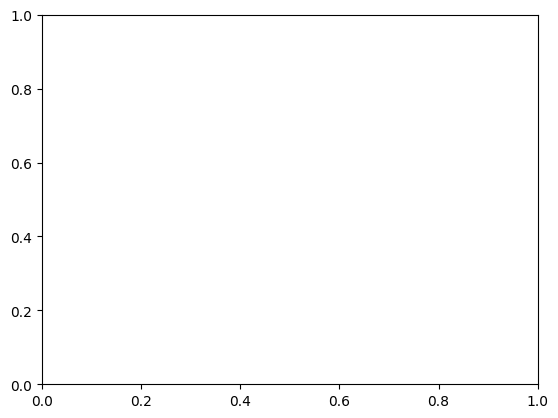

In [18]:
perplexity = np.arange(5, 55, 5)
divergence = []

for i in perplexity:
    print('starting tsne w perplexity ', i, '...')
    model = TSNE(n_components=3, init="pca", perplexity=i)
    reduced = model.fit_transform(X_train)
    divergence.append(model.kl_divergence_)


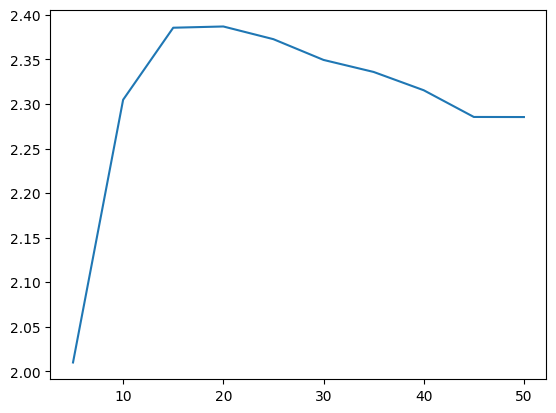

In [19]:
plt.plot(perplexity, divergence)

## running tSNE with optimal perplexity

In [20]:
tsne = TSNE(n_components=3, perplexity=5, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

tsne.kl_divergence_

2.0121757984161377

In [21]:
fig = px.scatter_3d(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], z=X_train_tsne[:, 2], color=y_train, opacity=0.8)
fig.update_layout(
    title="t-SNE visualization of the dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()